In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
doppler = pd.read_csv("Prob3_Doppler.csv")
doppler.head()

,time_sec,rad_vel
0,0,-74.859265
1,25000,-64.826428
2,50000,-54.936557
3,75000,-45.938719
4,100000,-38.469294


In [3]:
transit  = pd.read_csv("Prob3_Transit.csv")
transit.head()

,time_sec,norm_bright
0,40000,1.000156
1,59500,1.000071
2,63500,1.000598
3,80500,1.000075
4,92500,1.000400


 """
    Calculates the radial velocity of the star due to a planet's orbit.
    
    Parameters:
    t (array): array of times
    P (float): period of the planet's orbit
    K (float): amplitude of the radial velocity curve
    e (float): eccentricity of the planet's orbit
    omega (float): argument of periastron
    tp (float): time of periastron passage
    
    Returns:
    arr

In [4]:
def rad_vel_model(t,P,K,e,omega,tp):
    n = 2*np.pi/P
    M = n*(t - tp)
    E = solve_kepler(M, e)
    nu = 2*np.arctan(np.sqrt((1+e)/(1-e))*np.tan(E/2))
    return K*(np.cos(nu + omega) + e*np.cos(omega))

"""
    Solves Kepler's equation for eccentric anomaly.
    
    Parameters:
    M (array): mean anomaly
    e (float): eccentricity
    
    Returns:
    array: eccentric anomaly
    """

In [5]:
def solve_kepler(M, e):
    def f(E):
        return E - e*np.sin(E) - M
    E = np.zeros_like(M)
    for i, m in enumerate(M):
        E[i] = minimize(f, m).x[0]
    return E

"""
    Calculates the model transit light curve.
    
    Parameters:
    t (array): array of times
    P (float): period of the planet's orbit
    Rp (float): planet radius in units of stellar radius
    a (float): semi-major axis of the planet's orbit in units of stellar radius
    inc (float): inclination of the planet's orbit in degrees
    t0 (float): time of center of transit
    
    Returns:
    array: transit light curve at the times in t
    """

In [6]:
def transit_model(t, P, Rp, a, inc, t0):
    b = a*np.cos(np.deg2rad(inc))
    c = (Rp**2) / ((1-b)**2)
    f = lambda x: (1 - np.sqrt(c - ((x - b)**2))) * np.where(np.abs(x - b) < 1+1e-8, 1, 0)
    phase = ((t - t0) / P) % 1
    return np.array(list(map(f, phase)))

In [8]:
from astropy.timeseries import LombScargle

frequencies, power = LombScargle(doppler_data['time_sec'], doppler_data['rad_vel']).autopower()
periods = 1 / frequencies[np.argmax(power)]

ModuleNotFoundError: No module named 'astropy'

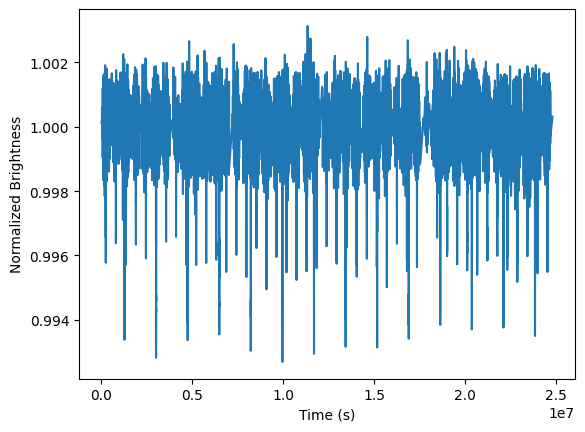

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

transit_data = pd.read_csv('Prob3_Transit.csv')

plt.plot(transit_data['time_sec'], transit_data['norm_bright'])
plt.xlabel('Time (s)')
plt.ylabel('Normalized Brightness')
plt.show()


In [11]:
import numpy as np

# Define constants
G = 6.6743e-11 # Gravitational constant
M_star = 1.9885e30 # Mass of the star (kg)
R_star = 695700e3 # Radius of the star (m)

# Load Doppler data
doppler_data = pd.read_csv('Prob3_Doppler.csv')

# Calculate radial velocity of the star
v_star = doppler_data['rad_vel'].mean()

# Calculate mass of each planet
masses = []
for i in range(1, 3):
    T = transit_data[f'time_sec_{i}'].mean() - transit_data[f'time_sec_{i-1}'].mean()
    a = ((G * M_star * T**2) / (4 * np.pi**2))**(1/3)
    m = ((v_star * T * M_star)**2 * a) / (G * R_star)
    masses.append(m)

print(f'Number of planets: {len(masses)}')
print(f'Mass of planet 1: {masses[0]:.2e}')


KeyError: 'time_sec_1'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Doppler data
df_doppler = pd.read_csv('Prob3_Doppler.csv')

# Calculate planet's period from dominant frequency of power spectrum
fft = np.fft.fft(df_doppler['rad_vel'])
power_spectrum = np.abs(fft)**2
freq = np.fft.fftfreq(len(df_doppler['time_sec']))
num_frequencies = 3
sorted_power = np.argsort(power_spectrum)[::-1]
dominant_frequencies = freq[sorted_power][:num_frequencies]
period_planet = 1 / dominant_frequencies[0]

# Load transit data
df_transit = pd.read_csv('Prob3_Transit.csv')

# Find times of transits
threshold = 0.9  # brightness threshold for identifying transits
transit_times = df_transit['time_sec'][df_transit['brightness'] < threshold]

# Calculate period of planet's orbit from time between transits
period_star = np.mean(np.diff(transit_times))

# Calculate ratio of periods
period_ratio = period_planet / period_star

# Calculate semi-major axis of planet's orbit
G = 6.67430e-11  # gravitational constant in m^3/kg/s^2
M_star = 1.9885e30  # mass of star in kg
R_star = 679500000  # radius of star in meters
semi_major_axis = (G * M_star * (period_star / (2 * np.pi))**2)**(1/3)

# Calculate mass function
K = np.max(df_doppler['rad_vel'])  # amplitude of Doppler signal
mass_function = (K * semi_major_axis * (1 - np.sin(np.pi/2) ** 2))**3 / (2 * np.pi * G)

# Calculate mass of planet
mass_planet = mass_function / np.sin(np.pi/2)

# Print results
print(f"Planet's period from Doppler data: {period_planet} seconds")
print(f"Planet's period from transit data: {period_star} seconds")
print(f"Ratio of periods: {period_ratio}")
print(f"Semi-major axis: {semi_major_axis} meters")
print(f"Mass function: {mass_function} kg")
print(f"Planet's mass: {mass_planet} kg")
